## Prep Work

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import datetime as dt
from prophet import Prophet
import plotly.express as px

In [2]:
# import Superstore (all orders)
super_df = pd.read_csv('../resources/superstore.csv')
super_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Profit Margin Percentage,Returned $ Amount,Days to Ship
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,...,221.98,2,0.0,62.15,40.77,High,0.0,27.998018,0.0,2
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,...,3709.40,9,0.1,-288.77,923.63,Critical,0.0,-7.784817,0.0,2
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,...,5175.17,9,0.1,919.97,915.49,Medium,0.0,17.776614,0.0,1
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,...,2892.51,5,0.1,-96.54,910.16,Medium,0.0,-3.337586,0.0,2
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,...,2832.96,8,0.0,311.52,903.04,Critical,0.0,10.996272,0.0,1


In [3]:
# convert order & ship date to datetime
# super_df['Order Date'] = pd.to_datetime(super_df['Order Date'])
# super_df['Ship Date'] = pd.to_datetime(super_df['Ship Date'])

In [4]:
# check dtypes
super_df.dtypes

Order ID                     object
Order Date                   object
Ship Date                    object
Ship Mode                    object
Segment                      object
City                         object
State                        object
Country                      object
Region                       object
Market                       object
Category                     object
Sub-Category                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Shipping Cost               float64
Order Priority               object
Returned                    float64
Profit Margin Percentage    float64
Returned $ Amount           float64
Days to Ship                  int64
dtype: object

### For Prophet - create dfs with only datetime and target variable

In [5]:
# create new df with only the order date & profit
profit = super_df[['Order Date', 'Profit']]
profit = profit.rename(columns={'Order Date': 'ds', 'Profit':'y'})
profit.head()

,ds,y
0,2014-11-11,62.15
1,2014-02-05,-288.77
2,2014-10-17,919.97
3,2014-01-28,-96.54
4,2014-11-05,311.52


In [6]:
# create a new df with only the order date & sales
sales = super_df[['Order Date', 'Sales']]
sales.head()

,Order Date,Sales
0,2014-11-11,221.98
1,2014-02-05,3709.40
2,2014-10-17,5175.17
3,2014-01-28,2892.51
4,2014-11-05,2832.96


In [7]:
# create a new df with only the order date & profit margin percentage
profit_margin = super_df[['Order Date', 'Profit Margin Percentage']]
profit_margin.head()

,Order Date,Profit Margin Percentage
0,2014-11-11,27.998018
1,2014-02-05,-7.784817
2,2014-10-17,17.776614
3,2014-01-28,-3.337586
4,2014-11-05,10.996272


In [8]:
# instantiate new Prophet object
m = Prophet()

In [9]:
# call prophet fit method and pass in profit df
m.fit(profit)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# extend dates into future 365 days
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1790,2016-12-26
1791,2016-12-27
1792,2016-12-28
1793,2016-12-29
1794,2016-12-30


In [11]:
# create predicted profit values (yhat) as well as lower & upper values
# for uncertainty intervals
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1790,2016-12-26,21.558861,-201.756077,228.860060
1791,2016-12-27,19.098844,-198.236491,249.922114
1792,2016-12-28,18.860503,-210.976611,245.128890
1793,2016-12-29,18.979650,-205.800731,251.703135
1794,2016-12-30,23.658554,-195.671286,246.176492


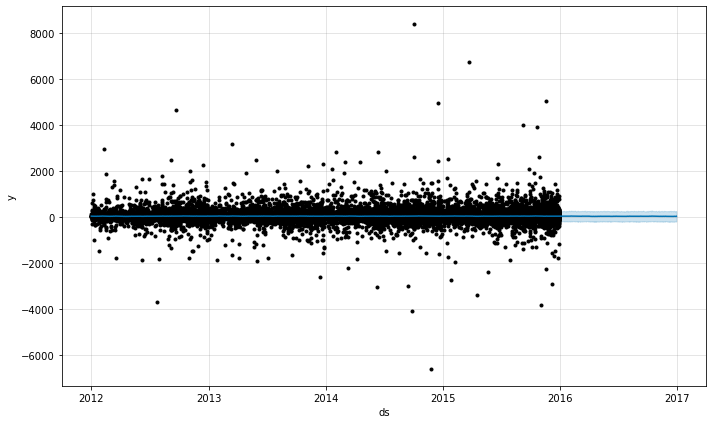

In [12]:
# plot the predicted profit values
fig1 = m.plot(forecast)

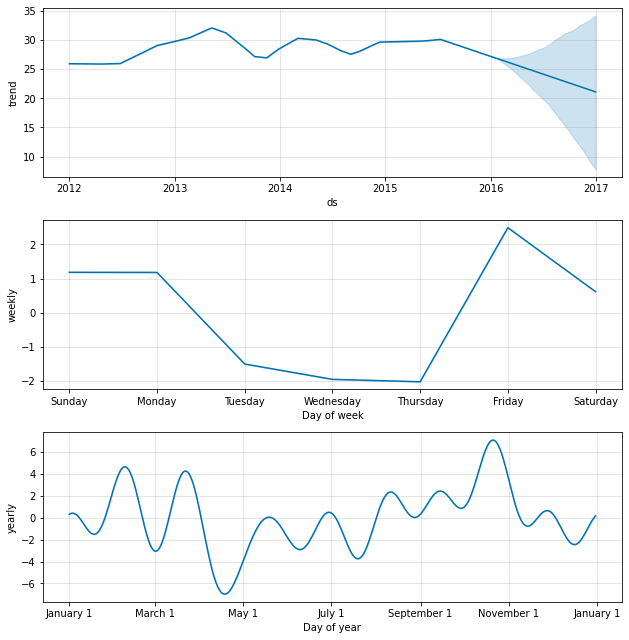

In [13]:
# see forecast commponents - trend, yearly seasonality, & weekly seasonality
fig2 = m.plot_components(forecast)